In [1]:

import numpy as np
import numpy.linalg as lin
import time as t

# cs771 will be our course package and will contain several modules
# Right now we have a dummy module, a data generation module and a data plotting module
from cs771 import helloWorld as hW
from cs771 import genSyntheticData as gsd
from cs771 import plotData as pd


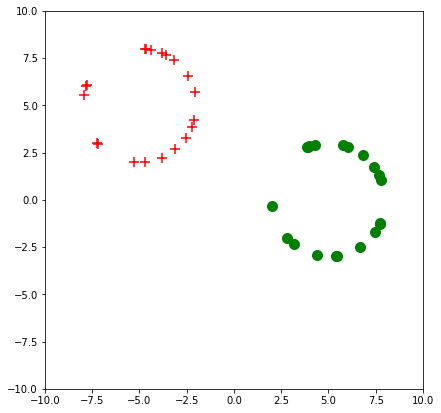

In [2]:
# We will work with a toy dataset in 2D with 20 points per class
# Feel free to change n and see what happens. Changing d will break things though
d = 2 
n = 20

# Choose points around which positive and negative class points will be sampled
muPos = np.array( [-5,5] )
muNeg = np.array( [5,0] )

# Generate nice spherical data using our data generation module
# Choose a nice radius
r = 3
XPos = gsd.genSphericalData( d, n, muPos, r )
XNeg = gsd.genSphericalData( d, n, muNeg, r )

# Let us plot these points on a plane and see where they landed
# First, obtain a new figure from the plotting module - the two arguments set the size of the figure
fig1 = pd.getFigure( 7, 7 )

# The three commands below are just to give the plot an aesthetic aspect ratio - do not worry about this
ax = fig1.add_axes( [0,0,0.75,0.75] )
ax.set_xlim( [-10, 10] )
ax.set_ylim( [-10, 10] )

# Now, plot the sampled points - you can change the color, marker and size of the markers
pd.plot2D( XPos, fig1, color = 'r', marker = '+' )
pd.plot2D( XNeg, fig1, color = 'g', marker = 'o' )

It took 3.668275521 seconds to complete the shading 


/home/cse/Dropbox/Teaching/CSE/CS771/ml19-20a-master/ml19-20a-master/cs771/plotData.py:116: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( xi, yi, zi, cmap = colorMap )


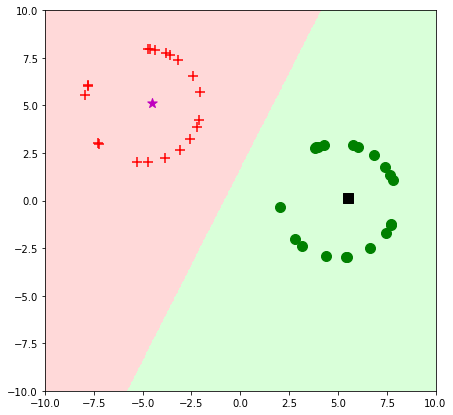

In [3]:
# Let us calculate prototypes for the two classes
protoPos = np.sum( XPos, 0 )/n
protoNeg = np.sum( XNeg, 0 )/n

# Define the Learning with Prototypes classifer
# This takes in just one 2D data point (x, y are scalars) and tells us which prototype was closer
def LwP( x, y ):
    return lin.norm( np.array( [x,y] ) - protoPos, 2 ) - lin.norm( np.array( [x,y] ) - protoNeg, 2 )

# Let us see what this classifier does i.e. where is its decision boundary
# Get another figure
fig2 = pd.getFigure( 7, 7 )

# Use the plotting module to shade the entire 2D space and visualize the decision boundary
tic = t.process_time()
pd.shade2D( LwP, fig2, mode = 'point', xlim = 10, ylim = 10 )
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the shading ")
pd.plot2D( XPos, fig2, color = 'r', marker = '+' )
pd.plot2D( XNeg, fig2, color = 'g', marker = 'o' )

# Plot the prototype locations as well to see where they lie w.r.t the decision boundary
pd.plot2DPoint( protoPos, fig2, color = 'm', marker = '*' )
pd.plot2DPoint( protoNeg, fig2, color = 'k', marker = 's' )

It took 0.05124706099999976 seconds to complete the shading 


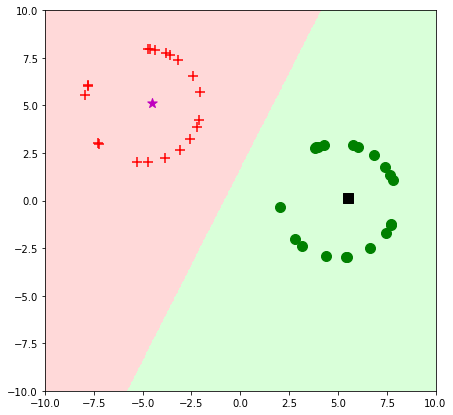

In [4]:
# Let us develop a (much) faster version of the LwP classifier. This takes in an entire matrix of data points
# and uses broadcasting to find the LwP decision on them all at once. In Python and other scripting languages
# processing data in batches is much faster than running a for loop that processes data one by one.
def LwPBatch( X ):
    return lin.norm( X - protoPos, ord = 2, axis = 1 ) - lin.norm( X - protoNeg, ord = 2, axis = 1 )

fig3 = pd.getFigure( 7, 7 )

# Use the batch mode now - try running both point and batch mode to see that this version is 20-30 times faster 
tic = t.process_time()
pd.shade2D( LwPBatch, fig3, mode = 'batch', xlim = 10, ylim = 10 )
toc = t.process_time()
print( "It took " + str(toc - tic) + " seconds to complete the shading ")
pd.plot2D( XPos, fig3, color = 'r', marker = '+' )
pd.plot2D( XNeg, fig3, color = 'g', marker = 'o' )
pd.plot2DPoint( protoPos, fig3, color = 'm', marker = '*' )
pd.plot2DPoint( protoNeg, fig3, color = 'k', marker = 's' )

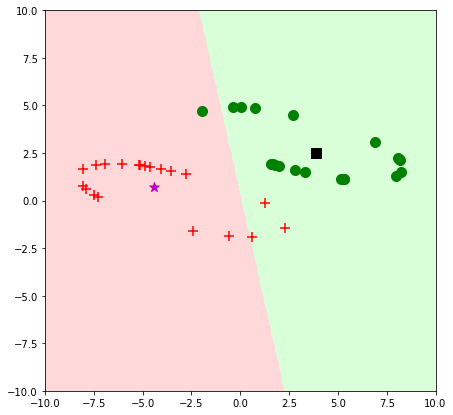

In [5]:
# Let us now generate data where LwP will fail
muPos = np.array( [-3,0] )
muNeg = np.array( [3,3] )
cov = np.array( [[16, -14] , [-14, 16]] )

XPos = gsd.genEllipticalData( d, n, muPos, cov )
XNeg = gsd.genEllipticalData( d, n, muNeg, cov )

# Since we have new data, we need to recalculate prototypes for the two classes
protoPos = np.sum( XPos, 0 )/n
protoNeg = np.sum( XNeg, 0 )/n

fig4 = pd.getFigure( 7, 7 )
pd.shade2D( LwPBatch, fig4, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig4, color = 'r', marker = '+' )
pd.plot2D( XNeg, fig4, color = 'g', marker = 'o' )
pd.plot2DPoint( protoPos, fig4, color = 'm', marker = '*' )
pd.plot2DPoint( protoNeg, fig4, color = 'k', marker = 's' )

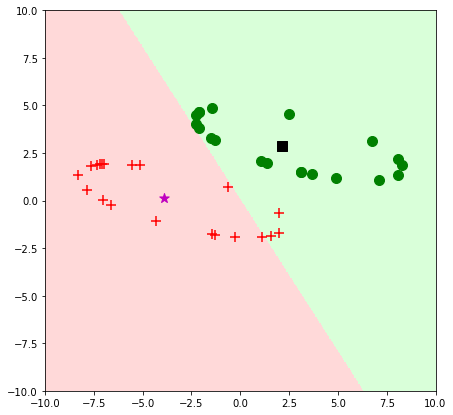

In [19]:
# We now use a weighted Euclidean distance to fix this problem
W = np.array( [[1/4, 1/4], [1/4, 1]] )
L = lin.cholesky( W )

# Recall that the weighted Euclidean distance is simply the Euclidean distance between vectors
# transformed using L where A = LL'
def LwPWeightedEuclideanBatch ( X ):
    return lin.norm( np.matmul( X - protoPos, L), ord = 2, axis = 1 ) - lin.norm( np.matmul( X - protoNeg, L), ord = 2, axis = 1 )

fig5 = pd.getFigure( 7, 7 )
pd.shade2D( LwPWeightedEuclideanBatch, fig5, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig5, color = 'r', marker = '+' )
pd.plot2D( XNeg, fig5, color = 'g', marker = 'o' )
pd.plot2DPoint( protoPos, fig5, color = 'm', marker = '*' )
pd.plot2DPoint( protoNeg, fig5, color = 'k', marker = 's' )

In [7]:
def LwPMahlanobisBatch ( X ):
    return lin.norm( np.matmul( X - protoPos, L), ord = 2, axis = 1 ) - lin.norm( np.matmul( X - protoNeg, L), ord = 2, axis = 1 )

/home/cse/Dropbox/Teaching/CSE/CS771/ml19-20a-master/ml19-20a-master/cs771/plotData.py:116: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh( xi, yi, zi, cmap = colorMap )


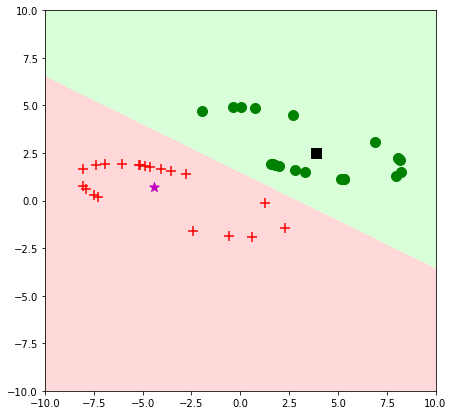

In [12]:
# We now use a Mahalanobis distance to fix the problem without having to specify a weight matrix
X = np.array(list(XPos) + list(XNeg))
B = np.linalg.inv(np.cov(X, rowvar=False))
L = lin.cholesky( B )

# Recall that the Mahalanobis distance w.r.t. matrix A is merely the Euclidean distance between vectors
# transformed using L where A = LL'
def LwPMahlanobisBatch ( X ):
    return lin.norm( np.matmul( X - protoPos, L), ord = 2, axis = 1 ) - lin.norm( np.matmul( X - protoNeg, L), ord = 2, axis = 1 )

fig5 = pd.getFigure( 7, 7 )
pd.shade2D( LwPMahlanobisBatch, fig5, mode = 'batch', xlim = 10, ylim = 10 )
pd.plot2D( XPos, fig5, color = 'r', marker = '+' )
pd.plot2D( XNeg, fig5, color = 'g', marker = 'o' )
pd.plot2DPoint( protoPos, fig5, color = 'm', marker = '*' )
pd.plot2DPoint( protoNeg, fig5, color = 'k', marker = 's' )

## Take home problem

1. Implement a kNN classifier to solve this same problem. 
2. Change the data such that kNN starts to have trouble classifying correctly
3. Find the best k for kNN for such data